# Anime Style Transformers

Image animation is a very interesting demo, which supports transform image to "celeba", "facepaint", "hayao", "paprika", "shinkai" etc. styles.

In [1]:
! python -m pip install towhee gradio

## Key components

Towhee Operator [Animegan](https://towhee.io/img2img-translation/animegan) is able to convert an image into an animated image using [AnimeganV2](https://tachibanayoshino.github.io/AnimeGANv2/). We can build a pipeline assembled with data processing operators such as `image-decode` and `img2img-translation`. Here is an example pipeline using 'celeba' model.

In [2]:
from towhee import pipe, ops, DataCollection

test_img = 'https://raw.githubusercontent.com/towhee-io/examples/main/image/image_animation/test.png'

p_celeba = (
    pipe.input('path')
        .map('path', 'img', ops.image_decode('rgb'))
        .map('img', 'anime', ops.img2img_translation.animegan('celeba'))
        .output('anime')
)

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com


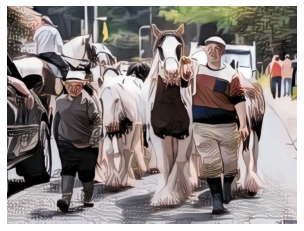

In [3]:
from matplotlib import pyplot as plt
from PIL import Image as PILImage
import numpy

img_np = p_celeba(test_img).get()[0]
plt.axis('off')
plt.imshow(img_np)
plt.show()

## Play with Towhee and Gradio

Of course, you can also start the server with Towhee and Gradio. First, define a `trans_img` function to support for passing in an image and model version.

In [4]:
def trans_img(input_img, version):
    if version == 'celeba':
        x = ops.img2img_translation.animegan('celeba').get_op()(input_img)
    elif version == 'facepaintv2':
        x = ops.img2img_translation.animegan('facepaintv2').get_op()(input_img)
    elif version == 'hayao':
        x = ops.img2img_translation.animegan('hayao').get_op()(input_img)
    elif version == 'paprika':
        x = ops.img2img_translation.animegan('paprika').get_op()(input_img)
    elif version == 'shinkai':
        x = ops.img2img_translation.animegan('shinkai').get_op()(input_img)
    return x

Then start the Gradio server, which defines the input and output images. After running, you can upload your image in the cell, or click http://127.0.0.1:7860/.

In [5]:
import gradio

interface = gradio.Interface(trans_img, 
                             [gradio.inputs.Image(type='pil', source='upload'),
                              gradio.inputs.Radio(['celeba', 'facepaintv2', 
                                                  'hayao', 'paprika', 'shinkai'])],
                              gradio.outputs.Image(type="numpy"), allow_flagging='never', allow_screenshot=False)

interface.launch(enable_queue=True, share=True)

IMPORTANT: You are using gradio version 3.3, however version 3.14.0 is available, please upgrade.
--------
Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://e65ed646cb3b09d8.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces: https://www.huggingface.co/spaces


(<gradio.routes.App at 0x7f21284131f0>,
 'http://127.0.0.1:7860/',
 'https://e65ed646cb3b09d8.gradio.app')